# BBVDATA Testing

In [1]:
import math
import numpy
import pandas as pd 
import matplotlib.pyplot as plt

from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import ReduceLROnPlateau

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/Users/dosya/Projects/lab_iis/jupyter/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
numpy.random.seed(7)

In [3]:
model = load_model('model.h5')
testing_dataframe = pd.read_csv("preprocessed.csv").drop("Unnamed: 0", axis=1)

In [4]:
def create_dataset(d, look_back=1):
    df = pd.DataFrame()
    for i, col in enumerate(testing_dataframe.columns):
        df[col] = d.T[i]
    d = df
    # normalize the dataset
    x_train, y_train = d.drop(["load", "amount"],axis=1).as_matrix(), d[["load", "amount"]].as_matrix()
    scaler_x = MinMaxScaler(feature_range=(0, 1)).fit(x_train)
    scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y_train)
    x_train = scaler_x.transform(x_train)
    y_train = scaler_y.transform(y_train)
    return numpy.array(x_train), numpy.array(y_train), scaler_x, scaler_y

In [5]:
feature_length = testing_dataframe.shape[1]
dataset = testing_dataframe[:10000]
dataset = dataset.astype('float32').as_matrix()

/Users/dosya/Projects/lab_iis/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
look_back = 1
testX, testY, scaler_testX, scaler_testY = create_dataset(dataset, look_back)
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

/Users/dosya/Projects/lab_iis/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [7]:
# make predictions
testPredict = model.predict(testX)

In [8]:
# invert predictions
testPredict = scaler_testY.inverse_transform(testPredict)
testY = scaler_testY.inverse_transform(testY)

Test Score: 21.38 RMSE


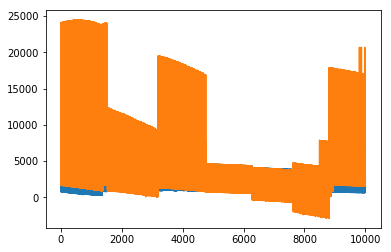

In [9]:
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot = testPredict
# plot baseline and predictions
plt.plot(scaler_testY.inverse_transform(testPredict))
plt.show()

In [10]:
import tensorflow as tf

In [11]:
correct = tf.equal(tf.argmax(testPredict, 1), tf.argmax(testY, 1))

In [12]:
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

In [13]:
testY[:5]

array([[80.,  1.],
       [30., 85.],
       [10., 62.],
       [10., 73.],
       [10., 67.]], dtype=float32)

In [14]:
testPredict[:5]

array([[  9.649245, 161.35127 ],
       [ 32.73741 ,  55.372974],
       [ 12.326384,  52.68964 ],
       [ 17.735178,  39.283367],
       [ 14.733621,  55.882347]], dtype=float32)